In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
image_alt = pd.read_csv("image_alt.csv") 
color_contrast = pd.read_csv("color_contrast.csv")
ally_scores = pd.read_csv("ally_scores.csv")

bytesTotal = pd.read_csv("bytesTotal.csv")
speed_index = pd.read_csv("speed_index.csv")

<Axes: xlabel='client', ylabel='count'>

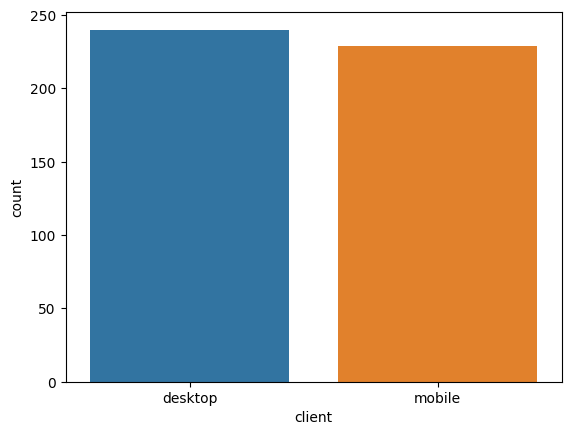

In [4]:
sns.countplot(x=bytesTotal['client'])

image_alt, color_contrast, ally_scores are one group, they describe the page accessibility

bytesTotal, speed_index are another group

In [5]:
## Page accessibility

explain of data:
- 'image_alt': The percentage of images with alt text, which describes the accessibility of images for blind or visually impaired individuals. 
- 'color_contrast':  Color contrast on web page,  good color contrast is essential for readability and accessibility,
- 'ally_scores' Accessibility scores that take into account various factors, such as alt text for images, color contrast

>‘Ally’ is a software created by the makers of Blackboard, a popular university LMS 
    system. This software allows us to scan all our digital content for accessibility errors. 
    This tool is automated, scans every day, and gives us a report on the 
    different accessibility issues it finds. 

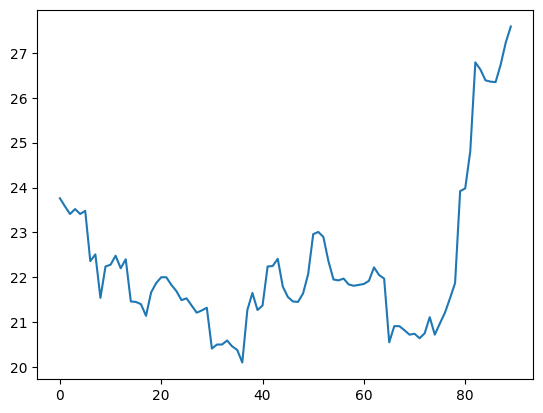

In [6]:
plt.plot(range(image_alt.shape[0]), color_contrast['percent'])

In [7]:
access = ally_scores.copy()
access['image_alt'] = image_alt['percent']
access['contrast'] = color_contrast['percent']
access = access.drop(['timestamp', 'measure'],axis=1)

access

client        date   p10    p25    p50    p75    p90  image_alt  contrast
0   desktop  2022_10_01  63.0  74.00  84.00  92.00  96.00      56.20     23.76
1    mobile  2022_10_01  63.0  74.00  84.00  91.00  96.00      56.90     23.58
2   desktop  2022_09_01  63.0  74.00  84.00  91.00  96.00      56.20     23.41
3    mobile  2022_09_01  63.0  73.00  84.00  91.00  96.00      56.86     23.52
4   desktop  2022_08_01  63.0  74.00  84.00  91.00  96.00      56.07     23.41
..      ...         ...   ...    ...    ...    ...    ...        ...       ...
85   mobile  2017_08_01  80.0  82.86  88.57  91.43  94.29      49.13     26.36
86   mobile  2017_07_15  80.0  82.86  88.57  91.43  94.29      49.03     26.35
87   mobile  2017_07_01  80.0  82.86  88.57  91.43  94.29      49.21     26.74
88   mobile  2017_06_15  80.0  82.86  88.57  91.43  94.29      49.05     27.23
89   mobile  2017_06_01  80.0  82.86  88.57  91.43  94.29      49.51     27.59

[90 rows x 9 columns]

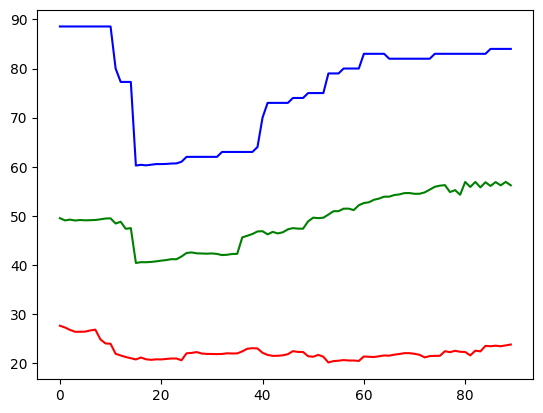

In [8]:
plt.plot(access.index, access['image_alt'][::-1], color='green')
plt.plot(access.index, access['contrast'][::-1], color='red')
plt.plot(access.index, access['p50'][::-1], color='blue')


<Axes: xlabel='p50', ylabel='Count'>

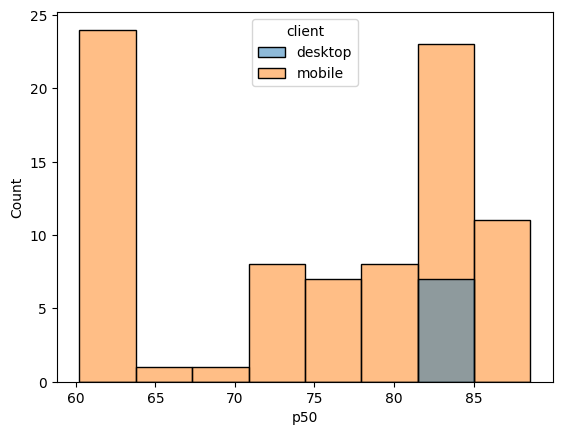

In [9]:
sns.histplot(data=access, x='p50', hue='client')

<Axes: xlabel='image_alt', ylabel='Count'>

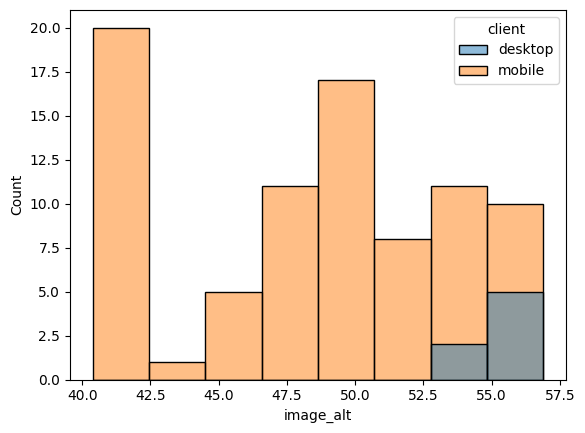

In [10]:
sns.histplot(data=access, x='image_alt', hue='client')

<Axes: xlabel='contrast', ylabel='Count'>

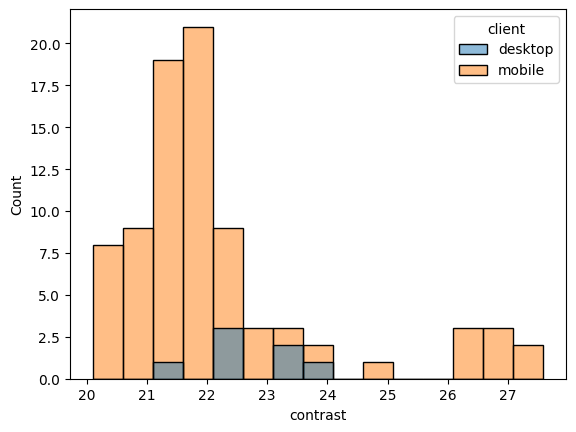

In [11]:
sns.histplot(data=access, x='contrast', hue='client')

<Axes: xlabel='date', ylabel='p50'>

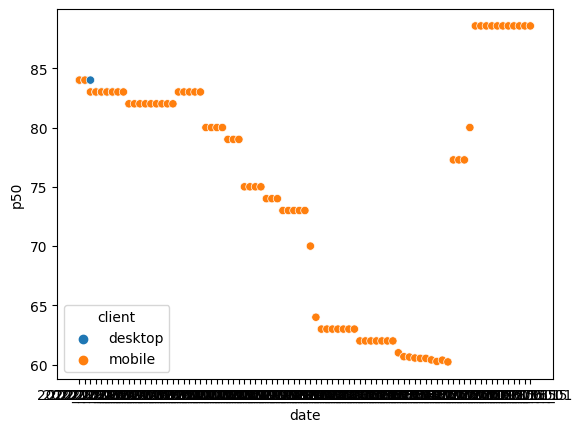

In [12]:
sns.scatterplot(data=access, x='date', y='p50', hue='client')

# bytes 

In [13]:
print(bytesTotal.sample())

    client        date     p10     p25      p50      p75      p90   
71  mobile  2020_05_01  350.74  870.06  1851.94  3590.08  6489.66  \

        timestamp  
71  1588291200000  


In [14]:
speed_index

measure   client        date   p10   p25   p50    p75    p90   
0    speedIndex  desktop  2022_10_01  1.59  2.42  3.88   6.45  10.52  \
1    speedIndex   mobile  2022_10_01  2.92  4.03  5.87   8.85  13.32   
2    speedIndex  desktop  2022_09_01  1.61  2.45  3.91   6.50  10.57   
3    speedIndex   mobile  2022_09_01  2.92  4.04  5.88   8.86  13.33   
4    speedIndex  desktop  2022_08_01  1.62  2.48  3.96   6.56  10.65   
..          ...      ...         ...   ...   ...   ...    ...    ...   
233  speedIndex   mobile  2016_02_01  3.68  5.21  7.67  11.15  15.64   
234  speedIndex  desktop  2016_01_15  1.57  2.56  3.91   5.87   8.79   
235  speedIndex   mobile  2016_01_15  3.68  5.16  7.64  11.21  15.75   
236  speedIndex  desktop  2016_01_01  1.57  2.57  3.92   5.88   8.75   
237  speedIndex   mobile  2016_01_01  3.70  5.16  7.60  10.98  15.11   

         timestamp  
0    1664582400000  
1    1664582400000  
2    1661990400000  
3    1661990400000  
4    1659312000000  
..             ...  
233  1454284800000  
234  1452816000000  
235  1452816000000  
236  1451606400000  
237  1451606400000  

[238 rows x 9 columns]

In [15]:
#a = bytesTotal['timestamp'][::interval]
#b = bytesTotal['date'][::interval]

<Axes: xlabel='timestamp', ylabel='p50'>

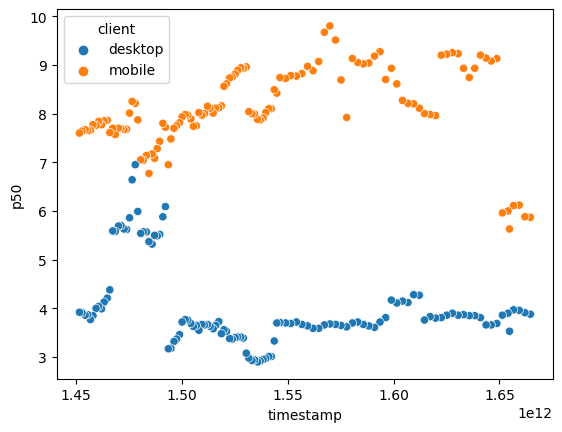

In [16]:
sns.scatterplot(x='timestamp', y='p50', hue='client', data=speed_index)

<Axes: xlabel='timestamp', ylabel='value'>

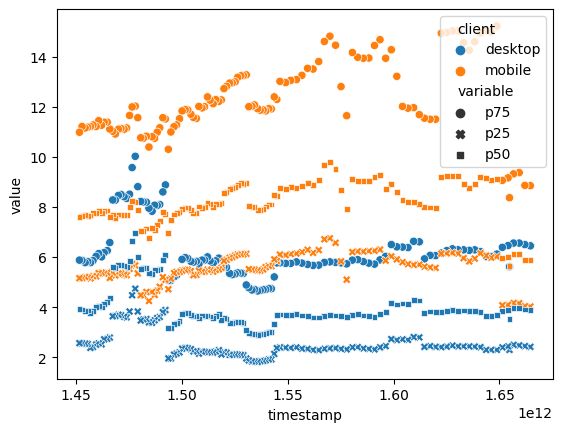

In [17]:
sps = speed_index.melt(id_vars=["timestamp","client"],value_vars=['p75','p25','p50'])
sns.scatterplot(x='timestamp', y='value', data=sps, style='variable', hue='client')

<Axes: xlabel='variable', ylabel='value'>

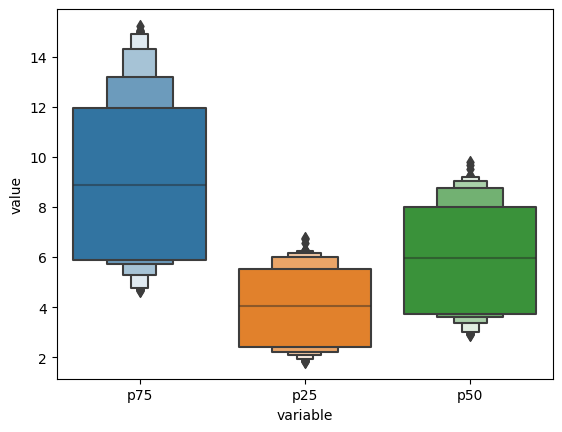

In [18]:
sns.boxenplot(x='variable', y='value', data=sps)

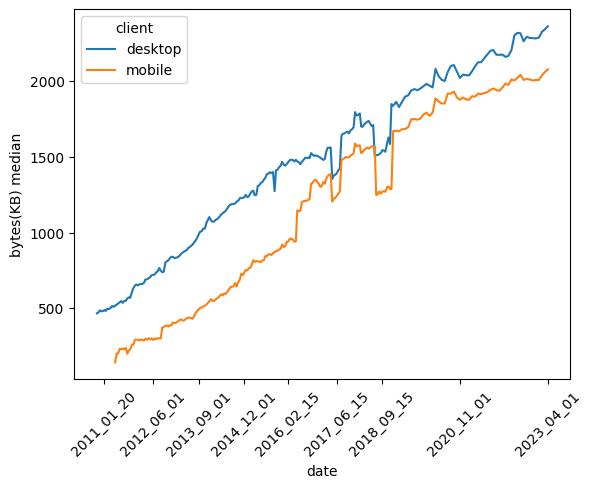

In [32]:
interval = int(bytesTotal.shape[0]/8)
sns.lineplot(x='timestamp', y='p50', hue='client', data=bytesTotal)
plt.ylabel("bytes(KB) median")
plt.xlabel("date")
_ = plt.xticks(bytesTotal['timestamp'][::interval],  bytesTotal['date'][::interval], rotation=45)

ValueError: The number of FixedLocator locations (41), usually from a call to set_ticks, does not match the number of labels (9).

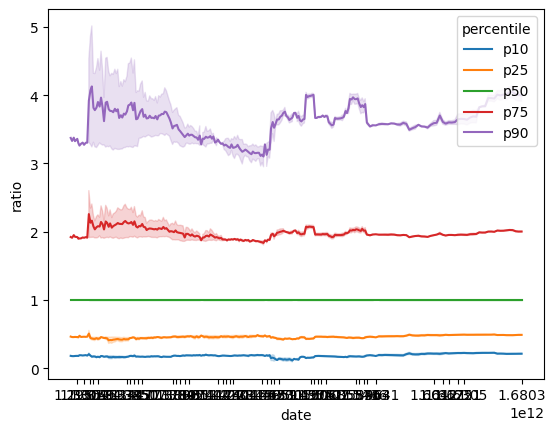

In [37]:
bytesTotalRatio = bytesTotal.copy()
bytesTotalRatio.p10 = bytesTotalRatio.p10 / bytesTotalRatio.p50
bytesTotalRatio.p90 = bytesTotalRatio.p90 / bytesTotalRatio.p50
bytesTotalRatio.p25 = bytesTotalRatio.p25 / bytesTotalRatio.p50
bytesTotalRatio.p75 = bytesTotalRatio.p75 / bytesTotalRatio.p50
bytesTotalRatio.p50 = bytesTotalRatio.p50 / bytesTotalRatio.p50
bytesTotalRatio =bytesTotalRatio.melt(id_vars=['timestamp', 'date','client'], var_name='percentile')
sns.lineplot(x='timestamp', y='value', hue='percentile', data=bytesTotalRatio)
plt.ylabel("ratio")
plt.xlabel("date")
plt.xticks(bytesTotalRatio['timestamp'][::interval],  bytesTotal['date'][::interval], rotation=45)


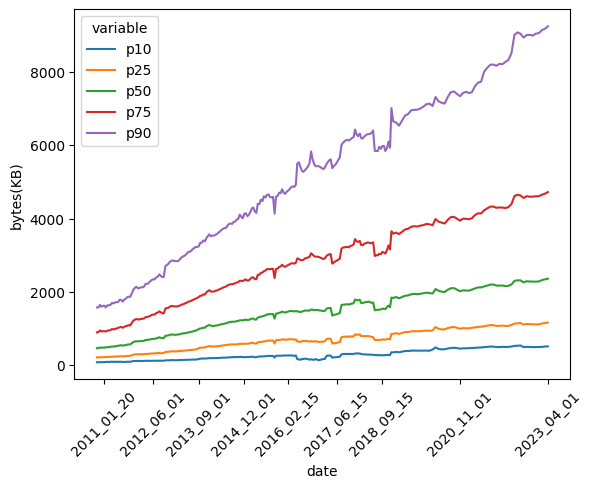

In [23]:
bytes_melt = bytesTotal.melt(id_vars=["timestamp","client"],value_vars=['p10','p25','p50', 'p75', 'p90'])
bytes_melt = bytes_melt.loc[bytes_melt["client"] == "desktop" ]
interval = int(bytesTotal.shape[0]/8)
sns.lineplot(x='timestamp', y='value', data=bytes_melt, hue='variable')
plt.ylabel("bytes(KB)")
plt.xlabel("date")
_ = plt.xticks(bytesTotal['timestamp'][::interval],  bytesTotal['date'][::interval], rotation=45)

In [ ]:
feat = bytesTotal.columns[3:-1]
bdr = bytesTotal.copy()
bdr[feat] = bdr[feat] / bdr['p50'].to_numpy()[:,None]

bytes_melt = bdr.melt(id_vars=["timestamp","client"],value_vars=['p10','p25','p50', 'p75', 'p90'])
bytes_melt = bytes_melt.loc[bytes_melt["client"] == "desktop" ]
interval = int(bytesTotal.shape[0]/8)
sns.lineplot(x='timestamp', y='value', data=bytes_melt, hue='variable')
plt.ylabel("ratio")
plt.xlabel("date")
_ = plt.xticks(bytesTotal['timestamp'][::interval],  bytesTotal['date'][::interval], rotation=45)

In [ ]:
feat = bytesTotal.columns[3:-1]
feat
# bt = bytesTotal[feat].to_numpy()

In [ ]:
btn = bt / bytesTotal['timestamp'][:,None]  * 100000

In [ ]:
sns.heatmap(np.cov(btn,rowvar=False))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
cls = PCA(n_components=5)
pca = cls.fit_transform(btn)
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue = bytesTotal['client'])